Taller 5 - métodos computacionales 2

Catalina Fuentes y Silvana Archila

1.  Monte Carlo y la integral de camino de Feynman

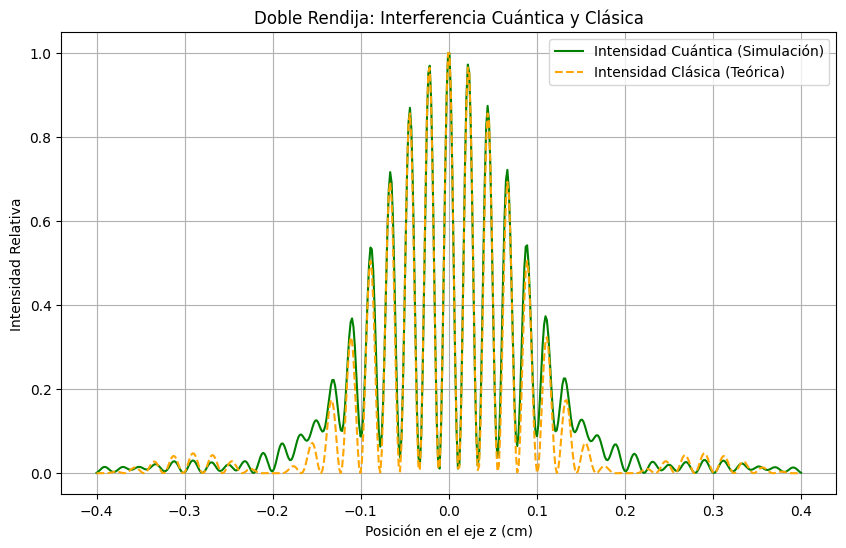

In [175]:
import numpy as np
import matplotlib.pyplot as plt


def intensidad_cuantica(posicion):
    integrando = np.exp((2j * np.pi * (distancia1 + distancia2)) / longitud_onda) * \
                 np.exp((1j * np.pi) / (longitud_onda * distancia1)) * (muestras_x - muestras_y)**2 * \
                 np.exp((1j * np.pi / (longitud_onda * distancia1)) * (posicion - muestras_y)**2)
    return np.abs(np.mean(integrando))**2 

def intensidad_clasica(posicion):
    angulo = np.arctan(posicion / distancia2)
    termino_sinc = (np.sinc((ancho_rendija / longitud_onda) * np.sin(angulo)))**2
    termino_cos = np.cos((np.pi * separacion / longitud_onda) * np.sin(angulo))**2
    return termino_cos * termino_sinc

#Parámetros
distancia1 = 30  
distancia2 = 30  
longitud_onda = 670e-7  
ancho_total = 0.1  
ancho_rendija = 0.01  
separacion = 0.09  
muestras = 100000  
rango_posicion = np.linspace(-0.4, 0.4, 500)  

#Genero muestras
muestras_x = np.random.uniform(-ancho_total / 2, ancho_total / 2, muestras)
muestras_y = np.concatenate((
    np.random.uniform(-ancho_rendija / 2 - separacion / 2, ancho_rendija / 2 - separacion / 2, muestras // 2),
    np.random.uniform(separacion / 2 - ancho_rendija / 2, separacion / 2 + ancho_rendija / 2, muestras // 2)
))

intensidades_cuanticas = np.array([intensidad_cuantica(pos) for pos in rango_posicion])
intensidades_cuanticas /= np.max(intensidades_cuanticas)

intensidades_clasicas = np.array([intensidad_clasica(pos) for pos in rango_posicion])
intensidades_clasicas /= np.max(intensidades_clasicas)

plt.figure(figsize=(10, 6))
plt.plot(rango_posicion, intensidades_cuanticas, label='Intensidad Cuántica (Simulación)', color='green')
plt.plot(rango_posicion, intensidades_clasicas, label='Intensidad Clásica (Teórica)', color='orange', linestyle='--')
plt.xlabel('Posición en el eje z (cm)')
plt.ylabel('Intensidad Relativa')
plt.title('Doble Rendija: Interferencia Cuántica y Clásica')
plt.legend()
plt.grid(True)
plt.show()



La gráfica muestra que el modelo clásico (línea naranja) no representa adecuadamente la distribución de la energía en el experimento de doble rendija, ya que predice menos detalles y subestima las variaciones en la intensidad. En contraste, el modelo cuántico (línea verde) captura con mayor precisión los picos de energía y las oscilaciones observadas, mostrando una representación más fiel de cómo se distribuye la energía en este tipo de fenómenos.

2. Metrópolis-Hastings para muestrear distribuciones 

2.a) Histograma comparado con distribución gamma.

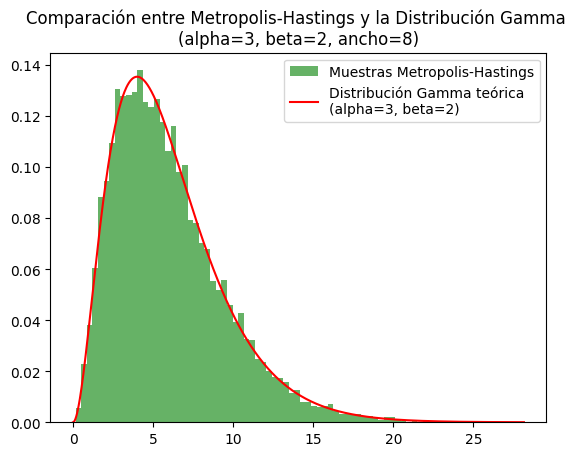

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

alpha = 3
beta = 2
ancho1 = 8
#función de la distribución Gamma 
def gamma_distr(x, alpha, beta):
    if x > 0:
        return x**(alpha - 1) * np.exp(-x / beta)
    else:
        return 0

#algoritmo de Metrópolis-Hastings
def metropolis_hastings_gamma(alpha, beta, N):
    x = np.random.rand()   
    samples = [x]
    
    for i in range(N):
        # Propuesta de un nuevo valor usando una distribución normal en torno al actual
        x_new = samples[-1] + np.random.normal(0, ancho1)
        
        # Calculamos la tasa de aceptación
        tasa = gamma_distr(x_new, alpha, beta) / gamma_distr(x, alpha, beta)
        
        # Aceptamos o rechazamos la propuesta
        if np.random.rand() < tasa:
            x = x_new
        
        samples.append(x)
    
    return np.array(samples)

N = 30000
samples = metropolis_hastings_gamma(alpha, beta, N)

#Histograma
plt.hist(samples, bins=80, density=True, alpha=0.6, color='g', label="Muestras Metropolis-Hastings")

#Función Gamma
x = np.linspace(0, np.max(samples), 1000)
plt.plot(x, stats.gamma.pdf(x, a=alpha, scale=beta), 'r-', label=f"Distribución Gamma teórica \n(alpha={alpha}, beta={beta})")

plt.legend()
plt.title(f"Comparación entre Metropolis-Hastings y la Distribución Gamma \n(alpha={alpha}, beta={beta}, ancho={ancho1})")
plt.show()


2.b) Recuperación de los parámetros alfa y beta

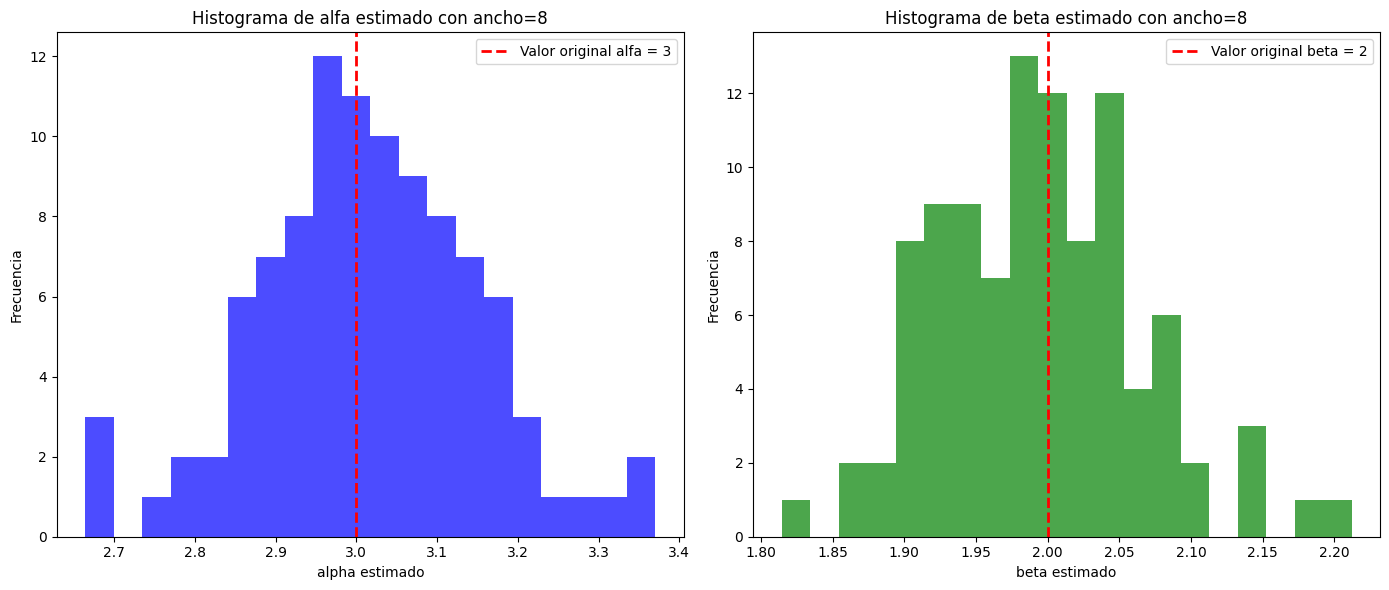

In [164]:
repeticiones = 100
N = 10000

alpha_estimados = []
beta_estimados = []

for i in range(repeticiones):
    samples = metropolis_hastings_gamma(alpha, beta, N)
    alpha_hat, loc, beta_hat = stats.gamma.fit(samples, scale=1)  
    alpha_estimados.append(alpha_hat)
    beta_estimados.append(beta_hat)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Histograma de alfa estimado
ax1.hist(alpha_estimados, bins=20, color='blue', alpha=0.7)
ax1.axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Valor original alfa = {alpha}')
ax1.set_title(f'Histograma de alfa estimado con ancho={ancho1}')
ax1.set_xlabel('alpha estimado')
ax1.set_ylabel('Frecuencia')
ax1.legend()

#Histograma de beta estimado
ax2.hist(beta_estimados, bins=20, color='green', alpha=0.7)
ax2.axvline(beta, color='red', linestyle='dashed', linewidth=2, label=f'Valor original beta = {beta}')
ax2.set_title(f'Histograma de beta estimado con ancho={ancho1}')
ax2.set_xlabel('beta estimado')
ax2.set_ylabel('Frecuencia')
ax2.legend()

plt.tight_layout()
plt.show()


In [165]:
desviacion_alpha = np.std(alpha_estimados)
desviacion_beta = np.std(beta_estimados)
print(f"La desviación estándar de alfa para un ancho={ancho1} es {desviacion_alpha}")
print(f"La desviación estándar de alfa para un ancho={ancho1} es {desviacion_beta}")

La desviación estándar de alfa para un ancho=8 es 0.13707514891877187
La desviación estándar de alfa para un ancho=8 es 0.07106282444226364


Con un ancho de la distribución de perturbación de 6, la desviación estándar de las estimaciones de alfa indica una dispersión moderada en las estimaciones. Para beta la desviación estándar fue más pequeña, lo que sugiere que las estimaciones de beta fueron más precisas. En general, el ajuste del ancho permitió recuperar los parámetros con buena precisión, especialmente en el caso de beta, donde la variabilidad fue menor.

2.c) Desviación estándar de los histogramas para distintos anchos de la distribución de perturbación

Probamos con un ancho mucho menor al utilizado anteriormente.

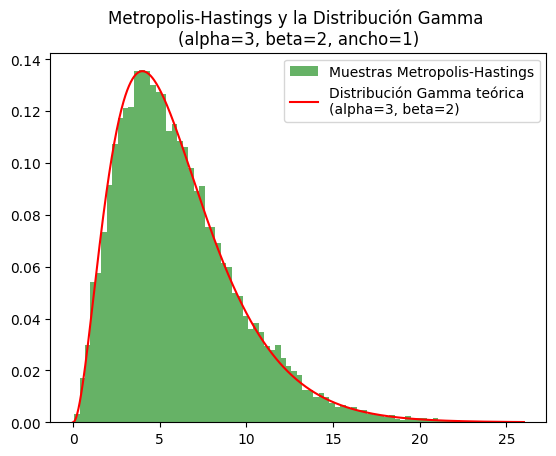

In [166]:
ancho2 = 1
def metropolis_hastings_gamma(alpha, beta, N):
    x = np.random.rand()   
    samples = [x]
    
    for i in range(N):
        # Propuesta de un nuevo valor usando una distribución normal en torno al actual
        x_new = samples[-1] + np.random.normal(0, ancho2) 
        
        # Calculamos la tasa de aceptación
        tasa = gamma_distr(x_new, alpha, beta) / gamma_distr(x, alpha, beta)
        
        # Aceptamos o rechazamos la propuesta
        if np.random.rand() < tasa:
            x = x_new
        
        samples.append(x)
    
    return np.array(samples)

N = 30000
samples2 = metropolis_hastings_gamma(alpha, beta, N)

#Histograma
plt.hist(samples2, bins=80, density=True, alpha=0.6, color='g', label="Muestras Metropolis-Hastings")

#Función Gamma
x = np.linspace(0, np.max(samples), 1000)
plt.plot(x, stats.gamma.pdf(x, a=alpha, scale=beta), 'r-', label=f"Distribución Gamma teórica \n(alpha={alpha}, beta={beta})")

plt.legend()
plt.title(f"Metropolis-Hastings y la Distribución Gamma \n(alpha={alpha}, beta={beta}, ancho={ancho2})")
plt.show()


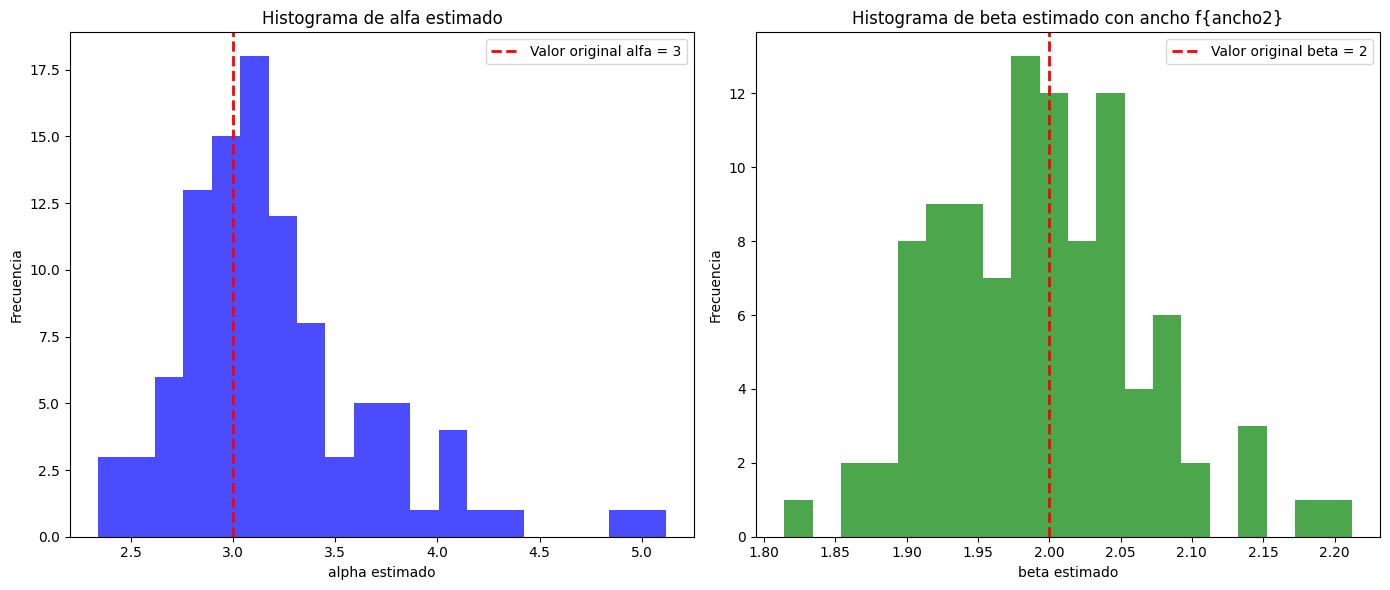

In [167]:
repeticiones = 100
N = 10000

alpha_estimados2 = []
beta_estimados2 = []

for i in range(repeticiones):
    samples = metropolis_hastings_gamma(alpha, beta, N)
    alpha_hat, loc, beta_hat = stats.gamma.fit(samples, scale=1)  
    alpha_estimados2.append(alpha_hat)
    beta_estimados2.append(beta_hat)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Histograma de alfa estimado
ax1.hist(alpha_estimados2, bins=20, color='blue', alpha=0.7)
ax1.axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Valor original alfa = {alpha}')
ax1.set_title('Histograma de alfa estimado')
ax1.set_xlabel('alpha estimado')
ax1.set_ylabel('Frecuencia')
ax1.legend()

#Histograma de beta estimado
ax2.hist(beta_estimados, bins=20, color='green', alpha=0.7)
ax2.axvline(beta, color='red', linestyle='dashed', linewidth=2, label=f'Valor original beta = {beta}')
ax2.set_title('Histograma de beta estimado con ancho f{ancho2}')
ax2.set_xlabel('beta estimado')
ax2.set_ylabel('Frecuencia')
ax2.legend()

plt.tight_layout()
plt.show()

Probamos con un ancho mucho mayor al utilizado anteriormente.

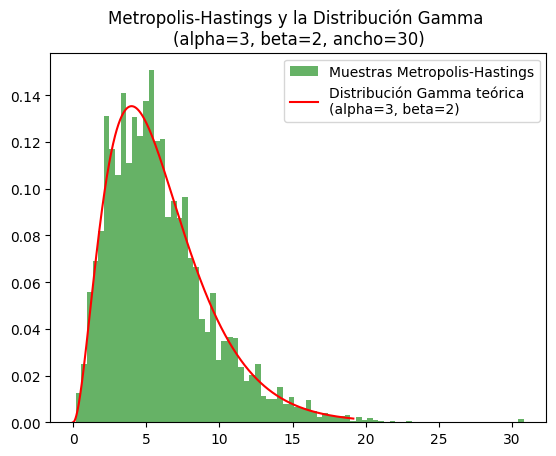

In [168]:
ancho3 = 30
def metropolis_hastings_gamma(alpha, beta, N):
    x = np.random.rand()   
    samples = [x]
    
    for i in range(N):
        # Propuesta de un nuevo valor usando una distribución normal en torno al actual
        x_new = samples[-1] + np.random.normal(0, ancho3) 
        
        # Calculamos la tasa de aceptación
        tasa = gamma_distr(x_new, alpha, beta) / gamma_distr(x, alpha, beta)
        
        # Aceptamos o rechazamos la propuesta
        if np.random.rand() < tasa:
            x = x_new
        
        samples.append(x)
    
    return np.array(samples)

N = 30000
samples2 = metropolis_hastings_gamma(alpha, beta, N)

#Histograma
plt.hist(samples2, bins=80, density=True, alpha=0.6, color='g', label="Muestras Metropolis-Hastings")

#Función Gamma
x = np.linspace(0, np.max(samples), 1000)
plt.plot(x, stats.gamma.pdf(x, a=alpha, scale=beta), 'r-', label=f"Distribución Gamma teórica \n(alpha={alpha}, beta={beta})")

plt.legend()
plt.title(f"Metropolis-Hastings y la Distribución Gamma \n(alpha={alpha}, beta={beta}, ancho={ancho3})")
plt.show()


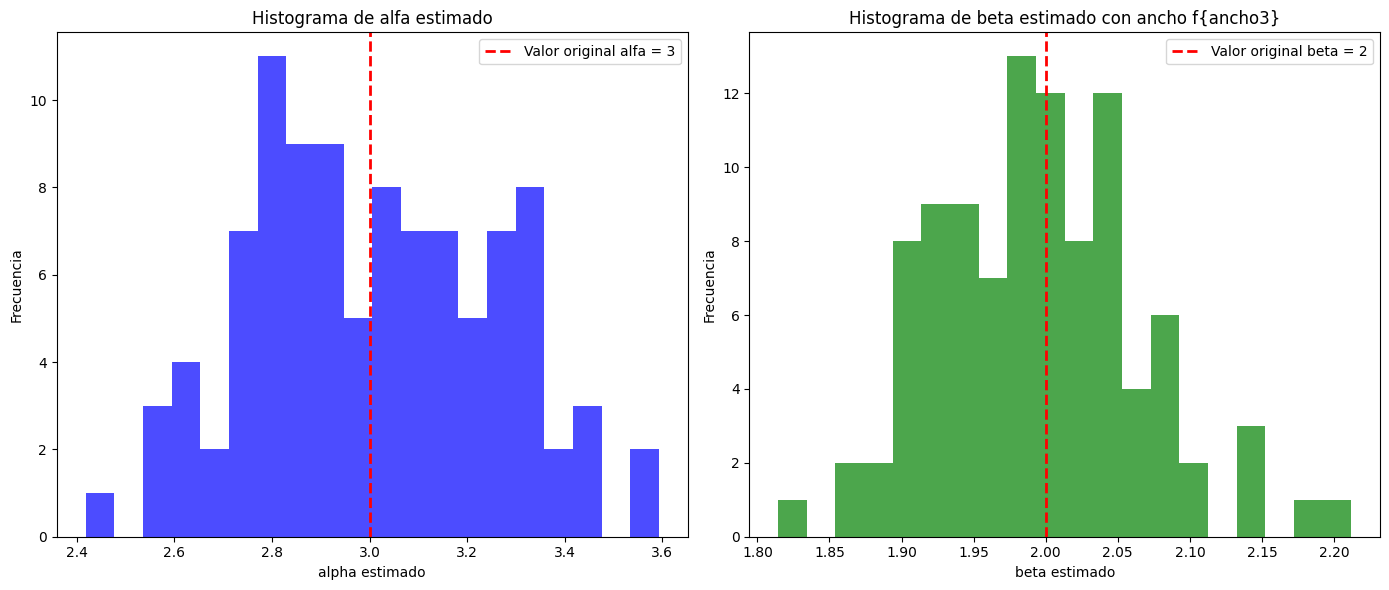

In [169]:
repeticiones = 100
N = 10000

alpha_estimados3 = []
beta_estimados3 = []

for i in range(repeticiones):
    samples = metropolis_hastings_gamma(alpha, beta, N)
    alpha_hat, loc, beta_hat = stats.gamma.fit(samples, scale=1)  
    alpha_estimados3.append(alpha_hat)
    beta_estimados3.append(beta_hat)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Histograma de alfa estimado
ax1.hist(alpha_estimados3, bins=20, color='blue', alpha=0.7)
ax1.axvline(alpha, color='red', linestyle='dashed', linewidth=2, label=f'Valor original alfa = {alpha}')
ax1.set_title('Histograma de alfa estimado')
ax1.set_xlabel('alpha estimado')
ax1.set_ylabel('Frecuencia')
ax1.legend()

#Histograma de beta estimado
ax2.hist(beta_estimados, bins=20, color='green', alpha=0.7)
ax2.axvline(beta, color='red', linestyle='dashed', linewidth=2, label=f'Valor original beta = {beta}')
ax2.set_title('Histograma de beta estimado con ancho f{ancho3}')
ax2.set_xlabel('beta estimado')
ax2.set_ylabel('Frecuencia')
ax2.legend()

plt.tight_layout()
plt.show()

Comparamos las 3 desviaciones

In [171]:
desviacion_alpha = np.std(alpha_estimados)
desviacion_beta = np.std(beta_estimados)
print(f"La desviación estándar de alfa para un ancho={ancho1} es {desviacion_alpha}")
print(f"La desviación estándar de beta para un ancho={ancho1} es {desviacion_beta}")

desviacion_alpha2 = np.std(alpha_estimados2)
desviacion_beta2 = np.std(beta_estimados2)
print(f"La desviación estándar de alfa para un ancho={ancho2} es {desviacion_alpha2}")
print(f"La desviación estándar de beta para un ancho={ancho2} es {desviacion_beta2}")

desviacion_alpha3 = np.std(alpha_estimados3)
desviacion_beta3 = np.std(beta_estimados3)
print(f"La desviación estándar de alfa para un ancho={ancho3} es {desviacion_alpha3}")
print(f"La desviación estándar de beta para un ancho={ancho3} es {desviacion_beta3}")

La desviación estándar de alfa para un ancho=8 es 0.13707514891877187
La desviación estándar de beta para un ancho=8 es 0.07106282444226364
La desviación estándar de alfa para un ancho=1 es 0.4846690554609212
La desviación estándar de beta para un ancho=1 es 0.27816767987987623
La desviación estándar de alfa para un ancho=30 es 0.2539178590012238
La desviación estándar de beta para un ancho=30 es 0.1376473221421799


De las desviaciones estándar anteriores determinamos que el ancho=8 es el mejor, ya que produce las desviaciones estándar más bajas tanto para alfa como para beta. El ancho de 1 genera desviaciones estándar más altas, lo que indica mayor dispersión en las estimaciones. Por otro lado, un ancho de 30 también genera desviaciones más grandes, aunque menores que el ancho de 1.

El ancho de perturbación afecta la precisión de las estimaciones porque controla qué tan grandes son los saltos propuestos en el algoritmo de Metrópolis-Hastings. Con un ancho muy pequeño (como el de 1), el algoritmo hace pequeños saltos, lo que lleva a una exploración lenta del espacio de parámetros, aumentando la variabilidad. Con un ancho muy grande (como el de 30), se generan saltos demasiado amplios, lo que disminuye la tasa de aceptación y aumenta la dispersión. Un ancho moderado (como 8) logra un buen balance entre exploración y aceptación, lo que produce histogramas más precisos que generan mejores aproximaciones de alfa y beta.

3. Modelo de Ising con Metrópolis-Hastings 

MovieWriter imagemagick unavailable; using Pillow instead.


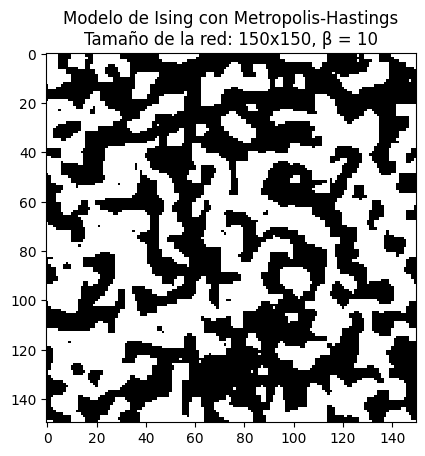

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

N = 150
J = 0.2
beta = 10
frames = 500
iteraciones = 400


def inicializar_el_sistema(N):
    grilla = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            grilla[i,j] = np.random.choice([-1, 1])       
    return grilla 
grilla = inicializar_el_sistema(N)


def calcular_energia_en_un_punto(grilla, i, j, N):
    E = -J*(grilla[i, j]* grilla[(i + 1) % N, j] + grilla[i, j]* grilla[(i - 1) % N, j] + grilla[i, j]* grilla[i, (j + 1) % N] + grilla[i, j]* grilla[i, (j - 1) % N])
    return  E


def nueva_configuracion( N, beta):
    global grilla
    i = np.random.randint(0, N)
    j = np.random.randint(0, N)

    perturbado = grilla.copy()
    if perturbado[i, j] == 1:
        perturbado[i, j] = -1
    else:
        perturbado[i, j] = 1

    E_old = calcular_energia_en_un_punto(grilla, i, j, N) +  calcular_energia_en_un_punto(grilla, (i-1)%N, j, N) +  calcular_energia_en_un_punto(grilla, (i+1)%N, j, N) +  calcular_energia_en_un_punto(grilla, i, (j-1)%N, N) +  calcular_energia_en_un_punto(grilla, i, (j+1)%N, N)
    E_new = calcular_energia_en_un_punto(perturbado, i, j, N) + calcular_energia_en_un_punto(perturbado, (i- 1)%N, j, N) + calcular_energia_en_un_punto(perturbado, (i+1)%N, j, N) + calcular_energia_en_un_punto(perturbado, i, (j-1)%N, N) + calcular_energia_en_un_punto(perturbado, i, (j+1)%N, N)

    delta_E = E_new - E_old

    if delta_E <= 0 or np.random.rand() <= np.exp(-delta_E * beta):
        grilla_final = perturbado.copy()
    else:
        grilla_final = grilla.copy()

    return grilla_final



def update(frames, im, N, beta, iteraciones):
    global grilla
    for i in range(iteraciones):
        grilla = nueva_configuracion( N, beta)
    im.set_array(grilla)
    return [im]

def animate_ising(N, beta, frames, iteraciones):
    grilla = inicializar_el_sistema(N)
    
    #Configurar la figura
    fig, ax = plt.subplots()
    im = ax.imshow(grilla, cmap='gray', interpolation='nearest')
    ax.set_title(f"Modelo de Ising con Metropolis-Hastings\nTamaño de la red: {N}x{N}, β = {beta}")
    
    #Crear la animación
    ani = animation.FuncAnimation(fig, update, frames=frames, fargs=(im, N, beta, iteraciones), interval=50)
    
    #Guardar el resultado en un archivo de video
    ani.save('ising_model_simulation.gif', writer='imagemagick', fps=10)
    
    plt.show()

#Ejecutar la animación
animate_ising(N, beta, frames, iteraciones)

4. Generación de lenguaje natural con cadenas de Markov: Adjunto en otro documento.

5. Evolución temporal de procesos estocásticos discretos

5.1) Sistema determinista

El Uranio-239 alcanza estado estable en: 2.10 días
El Neptunio-239 alcanza estado estable en: 27.51 días
El Plutonio-239 alcanza estado estable en: 21.26 días


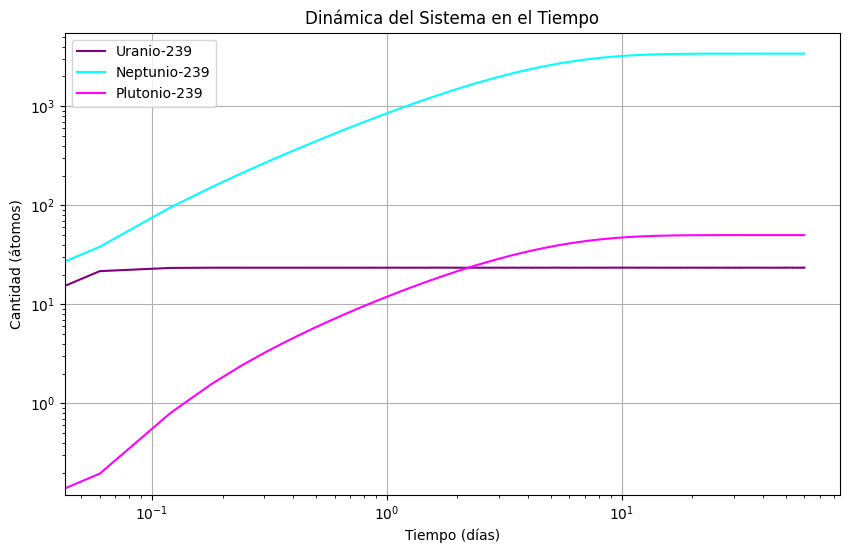

In [181]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Parámetros del sistema
produccion_diaria_U = 1000  
tasa_extraccion_Pu = 20    
constante_decaimiento_U = np.log(2) / (23.4 / 1440)  
constante_decaimiento_Np = np.log(2) / 2.36 

#Defino sistema
def modelo_sistema(tiempo, cantidades):
    uranio, neptunio, plutonio = cantidades
    dU = produccion_diaria_U - constante_decaimiento_U * uranio
    dNp = constante_decaimiento_U * uranio - constante_decaimiento_Np * neptunio
    dPu = constante_decaimiento_Np * neptunio - tasa_extraccion_Pu * plutonio
    return [dU, dNp, dPu]

# Condiciones iniciales
condiciones_iniciales = [0, 0, 0]
intervalo_tiempo = (0, 60)
tiempo_simulado = np.linspace(0, 60, 1000)
solucion = solve_ivp(modelo_sistema, intervalo_tiempo, condiciones_iniciales, t_eval=tiempo_simulado, method='RK45')
tiempo = solucion.t
solucion_U, solucion_Np, solucion_Pu = solucion.y

#Gráfica 
plt.figure(figsize=(10, 6))
plt.plot(tiempo, solucion_U, label="Uranio-239", color='purple')
plt.plot(tiempo, solucion_Np, label="Neptunio-239", color='cyan')
plt.plot(tiempo, solucion_Pu, label="Plutonio-239", color='magenta')
plt.xlabel("Tiempo (días)")
plt.ylabel("Cantidad (átomos)")
plt.title("Dinámica del Sistema en el Tiempo")
plt.legend()
plt.grid(True)

# Cálculo de los cambios entre pasos sucesivos
cambio_U = np.abs(np.diff(solucion_U))
cambio_Np = np.abs(np.diff(solucion_Np))
cambio_Pu = np.abs(np.diff(solucion_Pu))

# Definir tolerancia y encontrar el estado estable
tolerancia_cambio = 1e-3
estado_estable_uranio = np.where(cambio_U < tolerancia_cambio)[0][0] if np.any(cambio_U < tolerancia_cambio) else None
estado_estable_neptunio = np.where(cambio_Np < tolerancia_cambio)[0][0] if np.any(cambio_Np < tolerancia_cambio) else None
estado_estable_plutonio = np.where(cambio_Pu < tolerancia_cambio)[0][0] if np.any(cambio_Pu < tolerancia_cambio) else None

if estado_estable_uranio is not None:
    print(f"El Uranio-239 alcanza estado estable en: {tiempo[estado_estable_uranio]:.2f} días")
else:
    print("El Uranio-239 no alcanza estado estable.")
if estado_estable_neptunio is not None:
    print(f"El Neptunio-239 alcanza estado estable en: {tiempo[estado_estable_neptunio]:.2f} días")
else:
    print("El Neptunio-239 no alcanza estado estable.")
if estado_estable_plutonio is not None:
    print(f"El Plutonio-239 alcanza estado estable en: {tiempo[estado_estable_plutonio]:.2f} días")
else:
    print("El Plutonio-239 no alcanza estado estable.")

plt.xscale("log")
plt.yscale("log")
plt.show()



5.2.a) Simule hasta 𝑡 = 30 días y grafique la solución estocástica y la solución determinista.

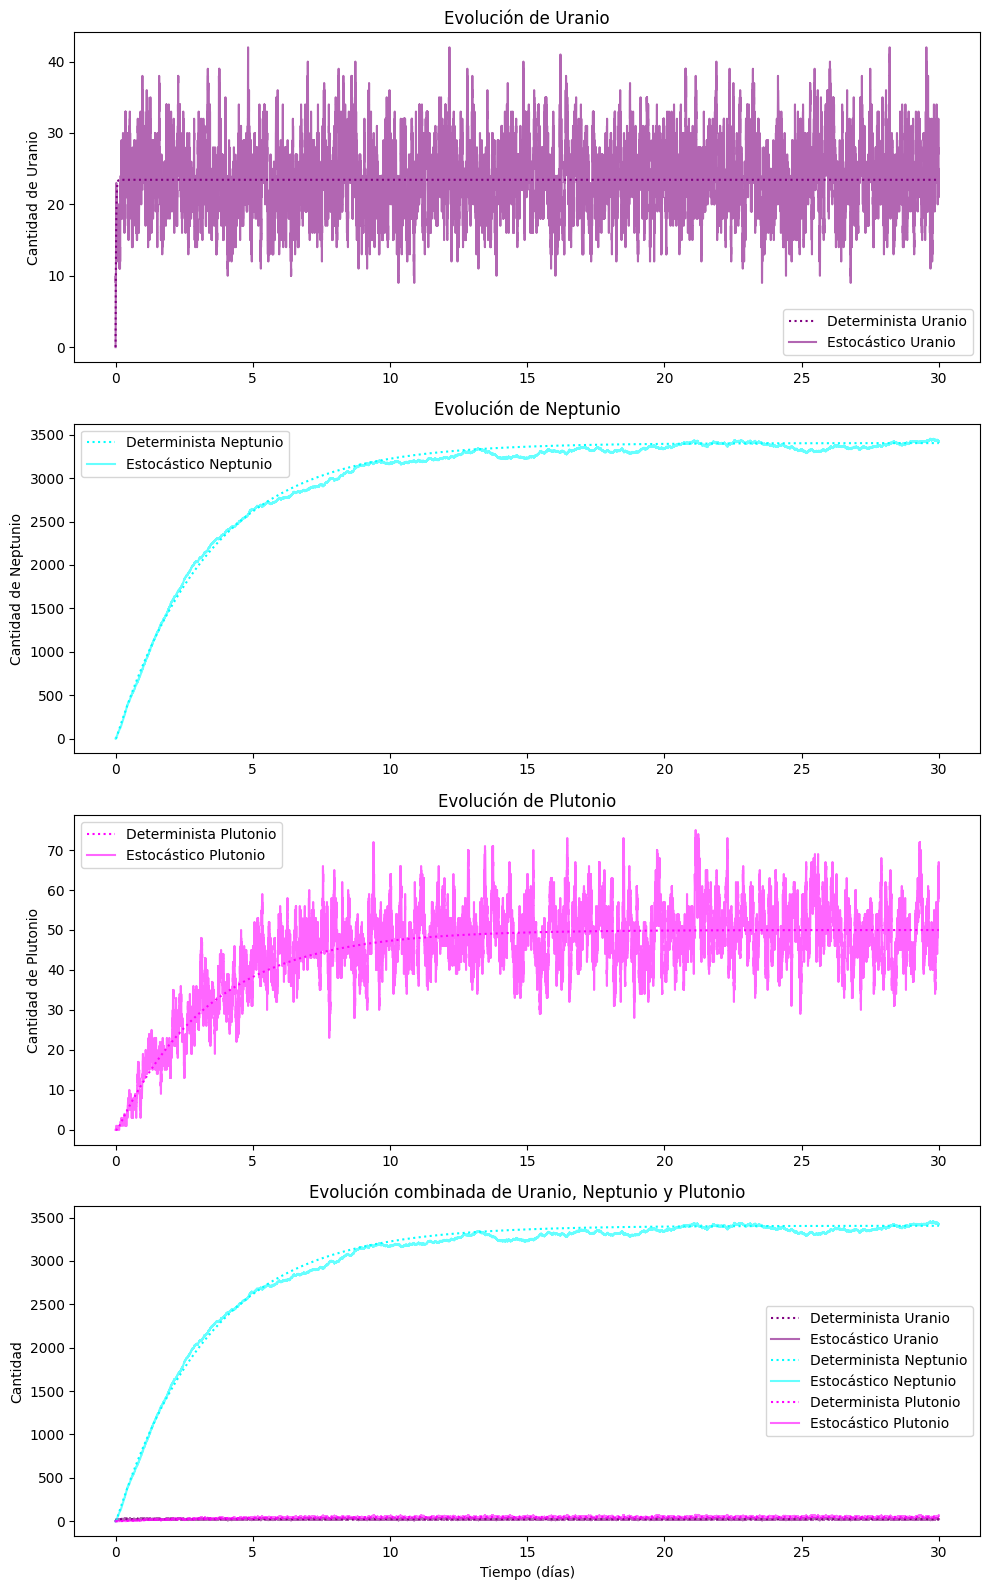

In [176]:
import numpy as np
import matplotlib.pyplot as plt

#Determinista
def simulacion_determinista(duracion, paso_tiempo=0.01):
    tiempo = np.arange(0, duracion + paso_tiempo, paso_tiempo)
    uranio, neptunio, plutonio = np.zeros_like(tiempo), np.zeros_like(tiempo), np.zeros_like(tiempo)
    uranio[0], neptunio[0], plutonio[0] = 0, 0, 0  

    for i in range(1, len(tiempo)):
        cambio_U = tasa_A - constante_U * uranio[i - 1]
        cambio_Np = constante_U * uranio[i - 1] - constante_Np * neptunio[i - 1]
        cambio_Pu = constante_Np * neptunio[i - 1] - tasa_B * plutonio[i - 1]

        uranio[i] = uranio[i - 1] + cambio_U * paso_tiempo
        neptunio[i] = neptunio[i - 1] + cambio_Np * paso_tiempo
        plutonio[i] = plutonio[i - 1] + cambio_Pu * paso_tiempo

    return tiempo, uranio, neptunio, plutonio

#Estocástica
def simulacion_estocastica_completa(duracion, paso_tiempo=0.01):
    t = 0
    uranio, neptunio, plutonio = 0, 0, 0
    tiempo, lista_U, lista_Np, lista_Pu = [0], [uranio], [neptunio], [plutonio]

    while t < duracion:
        tasas = np.array([tasa_A, uranio * constante_U, neptunio * constante_Np, plutonio * tasa_B])
        tasa_total = tasas.sum()
        if tasa_total == 0:
            break

        tau = np.random.exponential(1 / tasa_total)
        t += tau

        if t > duracion:
            break

        reaccion = np.random.choice([0, 1, 2, 3], p=tasas / tasa_total)

        if reaccion == 0:
            uranio += 1
        elif reaccion == 1:
            uranio -= 1
            neptunio += 1
        elif reaccion == 2:
            neptunio -= 1
            plutonio += 1
        elif reaccion == 3:
            plutonio -= 1

        tiempo.append(t)
        lista_U.append(uranio)
        lista_Np.append(neptunio)
        lista_Pu.append(plutonio)

    return np.array(tiempo), np.array(lista_U), np.array(lista_Np), np.array(lista_Pu)

#Parámetros
tasa_A = 1000
tasa_B = 20
constante_U = np.log(2) / (23.4 / 1440)
constante_Np = np.log(2) / 2.36

duracion_total = 30
tiempo_det, uranio_det, neptunio_det, plutonio_det = simulacion_determinista(duracion_total)
tiempo_estoc, uranio_estoc, neptunio_estoc, plutonio_estoc = simulacion_estocastica_completa(duracion_total)

datos_det = [uranio_det, neptunio_det, plutonio_det]
datos_estoc = [uranio_estoc, neptunio_estoc, plutonio_estoc]
nombres = ["Uranio", "Neptunio", "Plutonio"]
colores = ['purple', 'cyan', 'magenta']

#Gráficas
fig, graficas = plt.subplots(4, 1, figsize=(10, 16))
for i in range(3):
    graficas[i].plot(tiempo_det, datos_det[i], label=f"Determinista {nombres[i]}", color=colores[i], linestyle='dotted')
    graficas[i].plot(tiempo_estoc, datos_estoc[i], label=f"Estocástico {nombres[i]}", color=colores[i], alpha=0.6)
    graficas[i].set_ylabel(f"Cantidad de {nombres[i]}")
    graficas[i].set_title(f"Evolución de {nombres[i]}")
    graficas[i].legend()
    
for i in range(3):
    graficas[3].plot(tiempo_det, datos_det[i], label=f"Determinista {nombres[i]}", color=colores[i], linestyle='dotted')
    graficas[3].plot(tiempo_estoc, datos_estoc[i], label=f"Estocástico {nombres[i]}", color=colores[i], alpha=0.6)

graficas[3].set_xlabel("Tiempo (días)")
graficas[3].set_ylabel("Cantidad")
graficas[3].set_title("Evolución combinada de Uranio, Neptunio y Plutonio")
graficas[3].legend()

plt.tight_layout()
plt.show()


FALTA RESPONDER PREGUNTA

5.2.b) Haga muchas simulaciones, y determine la probabilidad de que el nivel de Plutonio llegue a ser
igual o mayor a 80. 

In [191]:
import numpy as np
import matplotlib.pyplot as plt

#Determinista
def simulacion_determinista(duracion, paso_tiempo=0.01):
    tiempo = np.arange(0, duracion + paso_tiempo, paso_tiempo)
    uranio, neptunio, plutonio = np.zeros_like(tiempo), np.zeros_like(tiempo), np.zeros_like(tiempo)
    uranio[0], neptunio[0], plutonio[0] = 0, 0, 0  

    for i in range(1, len(tiempo)):
        cambio_U = tasa_A - constante_U * uranio[i - 1]
        cambio_Np = constante_U * uranio[i - 1] - constante_Np * neptunio[i - 1]
        cambio_Pu = constante_Np * neptunio[i - 1] - tasa_B * plutonio[i - 1]

        uranio[i] = uranio[i - 1] + cambio_U * paso_tiempo
        neptunio[i] = neptunio[i - 1] + cambio_Np * paso_tiempo
        plutonio[i] = plutonio[i - 1] + cambio_Pu * paso_tiempo

    return tiempo, uranio, neptunio, plutonio

#Estocástica
def simulacion_estocastica_completa(duracion, paso_tiempo=0.01):
    t = 0
    uranio, neptunio, plutonio = 0, 0, 0
    tiempo, lista_U, lista_Np, lista_Pu = [0], [uranio], [neptunio], [plutonio]

    while t < duracion:
        tasas = np.array([tasa_A, uranio * constante_U, neptunio * constante_Np, plutonio * tasa_B])
        tasa_total = tasas.sum()
        if tasa_total == 0:
            break

        tau = np.random.exponential(1 / tasa_total)
        t += tau

        if t > duracion:
            break

        reaccion = np.random.choice([0, 1, 2, 3], p=tasas / tasa_total)

        if reaccion == 0:
            uranio += 1
        elif reaccion == 1:
            uranio -= 1
            neptunio += 1
        elif reaccion == 2:
            neptunio -= 1
            plutonio += 1
        elif reaccion == 3:
            plutonio -= 1

        tiempo.append(t)
        lista_U.append(uranio)
        lista_Np.append(neptunio)
        lista_Pu.append(plutonio)

    return np.array(tiempo), np.array(lista_U), np.array(lista_Np), np.array(lista_Pu)

#Parámetros
tasa_A = 1000
tasa_B = 20
constante_U = np.log(2) / (23.4 / 1440)
constante_Np = np.log(2) / 2.36
duracion_total = 30
simulaciones = 100
umbral_plutonio = 80

#Realizar 100 simulaciones y contar cuántas veces el nivel de plutonio llega a ser >= 80
conteo_exitos = 0

for i in range(simulaciones):
    i, i, i, plutonio_estoc = simulacion_estocastica_completa(duracion_total)
    if np.any(plutonio_estoc >= umbral_plutonio):
        conteo_exitos += 1

#Calcular la probabilidad
probabilidad = conteo_exitos / simulaciones
print(f'Probabilidad de que el nivel de plutonio sea >= {umbral_plutonio}: {probabilidad}')


Probabilidad de que el nivel de plutonio sea >= 80: 0.18
